In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as matplotlib
print(matplotlib.__version__)

3.3.4


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
FIGSIZE = (12,5)

In [4]:
AGE_BEGIN = 2010
AGE_END = 2020
years = [year for year in range(AGE_BEGIN,AGE_END+1)]

TARGET_IND = 'Налог на доходы физических лиц'
TARGET_ORG = 'Налог на прибыль организаций'

In [5]:
PATH = './data/Годовые отчеты об исполнении бюджета/'

profits_actual = {}
consumptions_actual = {}

for year in years:
    if year > 2015:
         comma = ','
    else:
        comma = ''
        
    #
    cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (исполнено){comma} {year}', header=1)
    #cons = cons.drop(0)
    consumptions_actual[year] = cons

    # 
    profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_actual[year] = profit

In [6]:
PATH = './data/Первоначальные бюджетные данные/'

profits_planned = {}
consumptions_planned = {}

for year in years:
    if year > 2017:
         comma = ','
    else:
        comma = ''
        
    #
    cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (план){comma} {year}', header=1)
    cons = cons.drop(0)
    consumptions_planned[year] = cons

    # 
    profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (план){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_planned[year] = profit

In [7]:
for year in years:
    profits_planned[year].rename(columns={f'{profits_planned[year].columns[0]}':'name'}, inplace=True)

In [8]:
targets_ind = [profits_planned[year][(profits_planned[year]['name'].str.strip() == TARGET_IND)].iloc[:,-2].values[0] for year in years]
targets_ind

[8415764100.0,
 8033981768.0,
 9351989850.0,
 10207986563,
 11252026928.0,
 11452230385.89,
 7865385000,
 11304320582.21,
 11865117341,
 13227068480.46,
 14437739887.02]

<BarContainer object of 11 artists>

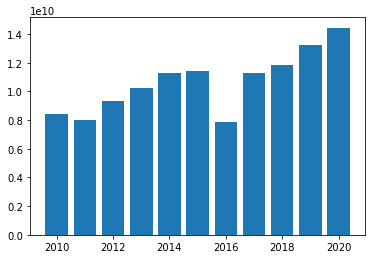

In [9]:
plt.bar(years, targets_ind)

In [10]:
targets_org = [profits_planned[year][(profits_planned[year]['name'].str.strip() == TARGET_ORG)].iloc[:,-2].values[0] for year in years]
targets_org

[971518000.0,
 3350000000.0,
 5619500000.0,
 6088000000,
 3563000000.0,
 2950636000.0,
 4483000000,
 5204100000,
 4634560000,
 8500000000,
 11084000000]

<BarContainer object of 11 artists>

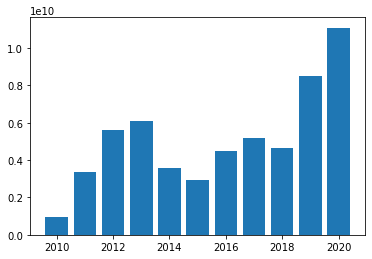

In [11]:
plt.bar(years, targets_org)

In [12]:
df = pd.DataFrame({'Год': years, TARGET_IND: targets_ind, TARGET_ORG: targets_org})

In [13]:
df

,Год,Налог на доходы физических лиц,Налог на прибыль организаций
0,2010,8415764100.00,971518000.00
1,2011,8033981768.00,3350000000.00
2,2012,9351989850.00,5619500000.00
3,2013,10207986563.00,6088000000.00
4,2014,11252026928.00,3563000000.00
5,2015,11452230385.89,2950636000.00
6,2016,7865385000.00,4483000000.00
7,2017,11304320582.21,5204100000.00
8,2018,11865117341.00,4634560000.00
9,2019,13227068480.46,8500000000.00


In [14]:
df.to_csv('./data/target.csv', index=False, encoding='utf-8-sig')